TODO Poner la cobertura de genes (muy pocos representados en el ME model)  
Titulos en ingles graficas  
Describir más los procesos


In [1]:
# Energy from the ME model

In [70]:
import re
import pickle
import numpy as np
import pandas as pd
from scipy import stats

# Own modules for analysis
from energy_analisis import (get_energy_consumption_production, energy_per_model,
                             get_energy_per_gene, get_energy_ME_proteome)
from plot_energy import plot_ME_energy, plot_glc_ox_atp, plot_energy_ME_proteome

In [3]:
# load solved ME model
with open('../files/models/iJL1678b_solver.pickle', 'rb') as f:
    me = pickle.load(f)

# ATP consumption per reaction 

In [4]:
# Get the consumption and production of energy per reaction
reactions_energy_consumption,reactions_energy_production = get_energy_consumption_production(me)

In [5]:
energy_consumption = pd.DataFrame.from_dict(reactions_energy_consumption).set_index('Reactions')
energy_consumption.head()

,Type,ATP,Used
Reactions,,,
transcription_TU0_8529_from_RpoD_mono,TranscriptionReaction,-347.0,-3.988197e-09
transcription_TU0_8464_from_RpoD_mono,TranscriptionReaction,-88.0,-2.039023e-04
transcription_TU0_13006_from_RpoD_mono,TranscriptionReaction,-172.0,-5.661036e-12
transcription_TU0_5003_from_RPOH_MONOMER,TranscriptionReaction,-434.0,-1.200694e-07
transcription_TU0_3423_from_RPOE_MONOMER,TranscriptionReaction,-109.0,-3.812990e-06


In [6]:
energy_production = pd.DataFrame.from_dict(reactions_energy_production).set_index('Reactions')
energy_production.head()

,Type,ATP,Used
Reactions,,,
ATPS4rpp_FWD_ATPSYN-CPLX_mod_mg2,MetabolicReaction,1.0,52.367990
NDPK1_FWD_ADENYL-KIN-MONOMER_mod_mg2,MetabolicReaction,-1.0,-9.991650
PGK_REV_PGK-CPLX,MetabolicReaction,1.0,12.566816
PPK2r_REV_PPK-CPLX,MetabolicReaction,1.0,0.000097
SUCOAS_REV_SUCCCOASYN,MetabolicReaction,1.0,3.955319


In [7]:
total_produced = energy_production.sum().Used
total_produced

58.8985714173988

In [8]:
# Save file
energy_consumption.to_pickle('../files/energy/energy_per_reaction.pickle')

In [9]:
with open('../files/energy/energy_per_reaction.pickle', 'rb') as f:
    energy_consumption = pickle.load(f)

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [10]:
energy_consumption.loc[:,'Used'] = abs(energy_consumption.Used)
energy_consumption.head()

,Type,ATP,Used
Reactions,,,
transcription_TU0_8529_from_RpoD_mono,TranscriptionReaction,-347.0,3.988197e-09
transcription_TU0_8464_from_RpoD_mono,TranscriptionReaction,-88.0,2.039023e-04
transcription_TU0_13006_from_RpoD_mono,TranscriptionReaction,-172.0,5.661036e-12
transcription_TU0_5003_from_RPOH_MONOMER,TranscriptionReaction,-434.0,1.200694e-07
transcription_TU0_3423_from_RPOE_MONOMER,TranscriptionReaction,-109.0,3.812990e-06


# ATP consumption per gene

In [11]:
total = get_energy_per_gene(energy_consumption, me)

In [12]:
Energia_total_ME = pd.DataFrame(total.items(), columns=['Bnumber', 'Value'])
Energia_total_ME = Energia_total_ME.sort_values(by='Value',ascending=False).reset_index()
Energia_total_ME = Energia_total_ME.loc[:,['Bnumber','Value']]

In [13]:
Energia_total_ME.to_pickle('../files/energy/energy_per_gene.pickle')

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [14]:
Energia_total_ME.head()

,Bnumber,Value
0,b3256,22.337696
1,dummy,1.671482
2,b2752,0.977113
3,b1677,0.232208
4,b0727,0.194296


# ATP consumption (Strains)

In [15]:
names_W3110 = ['DGF298', 'DGF327', 'MGF02', 'MGF01' ]
names_MG1655 = ['Δ16', 'MS56', 'MDS69','MDS42','MDS12']
strains = names_MG1655+names_W3110

genes_finales = {}

for strain in strains:
    genes_finales[strain] = pd.read_csv('../files/deleted_genes/mapped_del_genes_'+strain+'.csv')
    genes_finales[strain] = genes_finales[strain].drop(columns= 'Unnamed: 0')

#### Per gene

In [16]:
strain_energy_per_gen={}
for strain in strains:
    genes = genes_finales[strain].Bnumber
    strain_energy_per_gen[strain] = Energia_total_ME.loc[Energia_total_ME.Bnumber.isin(genes)]

#### Per strain

In [17]:
strain_energy_total={}
for strain in strains:
    strain_energy_total[strain] = [strain_energy_per_gen[strain].Value.sum()]
    
strain_energy_total_per={}
for strain in strains:
    strain_energy_total_per[strain] = [(strain_energy_per_gen[strain].Value.sum()*100)/(total_produced)]

In [18]:
consumo = pd.DataFrame.from_dict(strain_energy_total)
consumo = consumo.T.rename(columns={0:'Energy'}).T
consumo_per =  pd.DataFrame.from_dict(strain_energy_total_per)
consumo_per = consumo_per.T.rename(columns={0:'Energy'}).T

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [19]:
consumo

,Δ16,MS56,MDS69,MDS42,MDS12,DGF298,DGF327,MGF02,MGF01
Energy,0.788286,0.172213,0.167337,0.163238,0.163234,0.174018,0.168425,0.004769,0.003504


In [20]:
relevant_strains = ['Δ16', 'MS56', 'MDS69', 'DGF298', 'MGF02']

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>




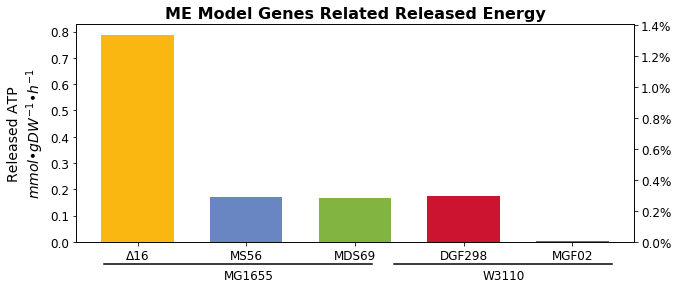

In [21]:
plot_ME_energy(relevant_strains,consumo, consumo_per )

# Energy analysis for each process

## Replication 

In [22]:
replication_models = ['1', '1.125', '1.25', '1.5']
models = {}

for rep_model in replication_models:
    with open('../files/models/DNA_per'+rep_model+'.pickle', 'rb') as f:
        models[rep_model] = pickle.load(f)

In [23]:
models

{'1': <MEModel iJL1678b-ME at 0x7fdc5ab43208>,
 '1.125': <MEModel iJL1678b-ME at 0x7fdc5acb8b00>,
 '1.25': <MEModel iJL1678b-ME at 0x7fdc5accb278>,
 '1.5': <MEModel iJL1678b-ME at 0x7fdc5acb8668>}

In [24]:
consumption_me,p = energy_per_model(models)

In [25]:
consumption_me

{'me1': 48.83228748371048,
 'me1.125': 48.842039251079456,
 'me1.25': 48.85179103734148,
 'me1.5': 48.87129454230218}

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





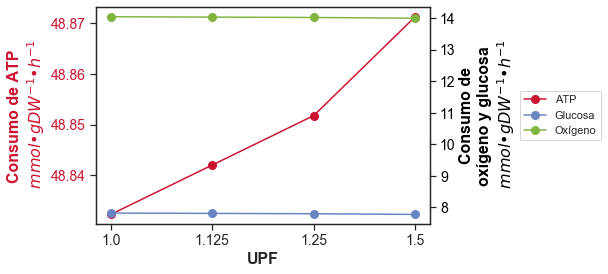

In [26]:
plot_glc_ox_atp(consumption_me, models)

In [27]:
valores = [1, 1.125, 1.25, 1.5]
new_valores = np.array(valores)

equivalentes_genoma = new_valores*1.63 
equivalentes_genoma
bp = equivalentes_genoma*4641652/1.63
Mb = bp*1/(1*10**6)

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Mb, list(consumption_me.values()))

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [29]:
replication_cost = slope
replication_cost

0.016807404105231676

## Transcription 

In [30]:
extra_genes = ['230', '460', '690', '920']
extra_genes_int = [int(genes) for genes in extra_genes]
transcription_models = {}
solutions = []

for gene in extra_genes:
    with open('../files/models/AumGenes_GLC_OX_'+gene+'.pickle', 'rb') as f:
        model = pickle.load(f)
        model.name = gene
        transcription_models[gene]= model
        solutions.append(model.solution.f)
    


### Global

In [31]:
consumption_me_trn, consumption_me_group, p = energy_per_model(transcription_models, group=True)

In [32]:
consumption_me_trn

{'me230': 51.77917211144516,
 'me460': 54.70214019240527,
 'me690': 57.625234172573656,
 'me920': 60.54832815274208}

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





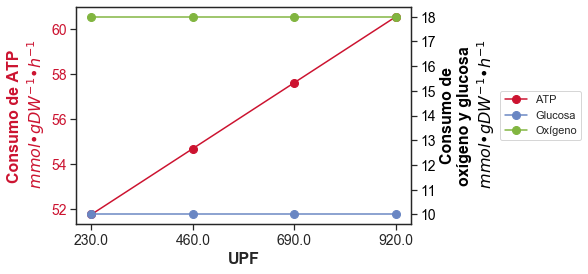

In [33]:
plot_glc_ox_atp(consumption_me_trn, transcription_models)

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(extra_genes_int, [consumption_me_trn['me'+genes] for genes in extra_genes])
costo_Mb = (10**6 )* slope / 900
costo_Mb

14.12104449471456

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [35]:
transcription_gcost =  costo_Mb

### Transcription fluxes

In [36]:
consumption_transR = {}
for genes in consumption_me_group:
    consumption_transR[genes] = consumption_me_group[genes].loc['TranscriptionReaction']

In [37]:
consumption_transR

{'me230': 0.20475514375843407,
 'me460': 0.2641392705772779,
 'me690': 0.32352583607409535,
 'me920': 0.382912401570913}

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





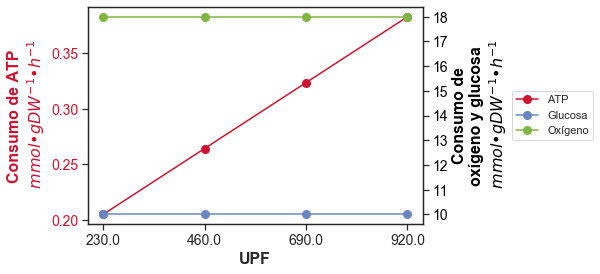

In [38]:
plot_glc_ox_atp(consumption_transR, transcription_models)

In [39]:
slope_2, intercept_2, r_value, p_value, std_err = stats.linregress(extra_genes_int,
                                                                   [consumption_transR['me'+genes] for genes in extra_genes])

costo_Mb_2 = (10**6 )* slope_2 / 900
costo_Mb_2

0.28688808644166874

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [40]:
transcription_tcost = costo_Mb_2
transcription_tcost

0.28688808644166874

## UPF

In [41]:
valores= ['0.24', '0.27', '0.3', '0.33', '0.36']
modelos_ox_glc = {}
for upf in valores:
    name = 'me'+upf.split('.')[1]
    with open('../files/models/ATPM_UPF_OX_GLC'+name+'.pickle', 'rb') as f:
        modelos_ox_glc[upf] = pickle.load(f)


In [42]:
modelos_ox_glc

{'0.24': <MEModel iJL1678b-ME at 0x7fdc0b352ac8>,
 '0.27': <MEModel iJL1678b-ME at 0x7fdc1ac04a90>,
 '0.3': <MEModel iJL1678b-ME at 0x7fdc1ac04b00>,
 '0.33': <MEModel iJL1678b-ME at 0x7fdc1ac04dd8>,
 '0.36': <MEModel iJL1678b-ME at 0x7fdbc81ff240>}

### Whole

In [43]:
consumption_me_ox_glc, production_me_ox_glc = energy_per_model(modelos_ox_glc)

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





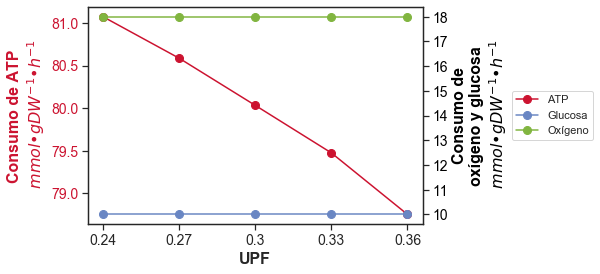

In [44]:
plot_glc_ox_atp(consumption_me_ox_glc, modelos_ox_glc)

### Cellular consumption

In [45]:

suma_atpm_consum_ox = pd.DataFrame({'me'+modelo:[consumption_me_ox_glc['me'+modelo],
                                            modelos_ox_glc[modelo].reactions.get_by_id('ATPM').x,
                                            consumption_me_ox_glc['me'+modelo] - modelos_ox_glc[modelo].reactions.get_by_id('ATPM').x] for modelo in modelos_ox_glc})

suma_atpm_consum_ox = suma_atpm_consum_ox.T
suma_atpm_consum_ox.columns=['Total_Consumption','ATPM','Celular_Consumption']

In [46]:
suma_atpm_consum_ox.sort_index()

,Total_Consumption,ATPM,Celular_Consumption
me0.24,81.073349,33.221185,47.852164
me0.27,80.586732,32.352479,48.234253
me0.3,80.033724,31.365251,48.668473
me0.33,79.476319,30.236040,49.240279
me0.36,78.754471,28.937432,49.817039


In [47]:
cel_con = suma_atpm_consum_ox['Celular_Consumption']

In [48]:
cel_con

me0.24    47.852164
me0.27    48.234253
me0.3     48.668473
me0.33    49.240279
me0.36    49.817039
Name: Celular_Consumption, dtype: float64

<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





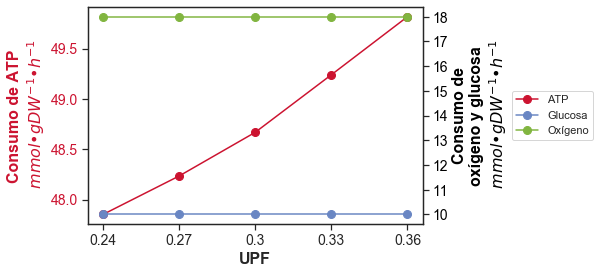

In [49]:
plot_glc_ox_atp(cel_con.to_dict(), modelos_ox_glc)

In [50]:
slope, intercept, r_value, p_value, std_err = stats.linregress([0.24,0.27,0.3,0.33,0.36],list(cel_con.values))



slope por cada 1 de UPF o por cada 100 %, 0.01 de UPF  = 1% proteoma

In [51]:
slope*0.01

0.16452584583939214

<div class="alert alert-block alert-info">
<b>Editar</b> Mi miau </div>

In [52]:
scientific_notation = "{:.2e}".format(slope*0.01)

print(scientific_notation)

1.65e-01


In [53]:
upf_cost = slope*0.01
upf_cost
 

0.16452584583939214

# Energy taking account proteome

In [54]:
import pandas as pd
import numpy as np
import pickle

In [55]:
proteomic_data = pd.read_excel("../files/proteome_Schmidt/Proteomic_data_fg.xlsx") 



In [56]:
print(replication_cost)
print(transcription_gcost )
print(transcription_tcost )
print(upf_cost )




0.016807404105231676
14.12104449471456
0.28688808644166874
0.16452584583939214


In [61]:
costos_calculados = get_energy_ME_proteome(strains, genes_finales, proteomic_data, 
                                           replication_cost, transcription_tcost, upf_cost )

In [63]:
costos_calculados = pd.DataFrame(costos_calculados)

In [65]:
costos_calculados.loc[['Replication', 'Transcription', 'UPF'],:]

,Δ16,MS56,MDS69,MDS42,MDS12,DGF298,DGF327,MGF02,MGF01
Replication,0.014900,0.014593,0.014495,0.010143,0.005486,0.025221,0.020973,0.017605,0.015525
Transcription,0.254328,0.249094,0.247409,0.173130,0.093647,0.430499,0.357992,0.300503,0.265002
UPF,1.382076,0.663690,0.404314,0.272571,0.119124,0.986304,0.905680,0.699351,0.660157


<div class="alert alert-block alert-success">
<b>Edit </b> 
</div>





(0.0, 1.7338690377998782) (0.0, 2.9445898010644305)


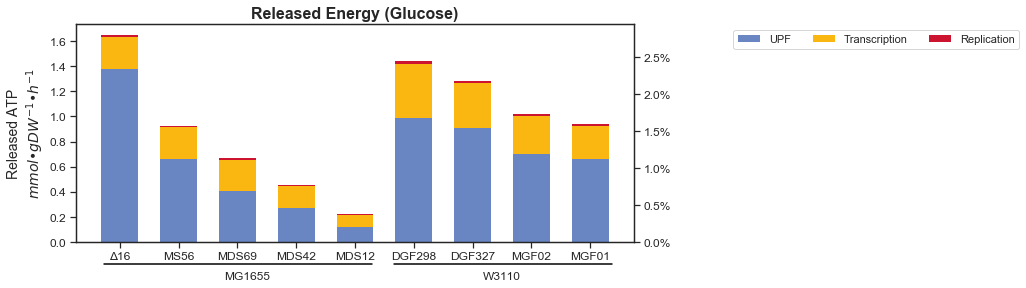

In [67]:
plot_energy_ME_proteome(strains, costos_calculados, ['UPF','Transcription','Replication'], medio='Glucose',
                 normalizado=False, eng=True, identifier='Multipanel_Energy_prot'  ) 

#### Normalized

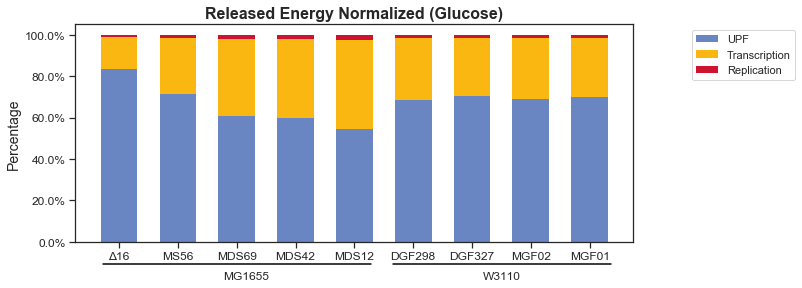

In [130]:
plot_energy_ME_proteome(strains, costos_calculados, ['UPF','Transcription','Replication'], medio='Glucose',
                 normalizado=True, eng=True, identifier='Multipanel_Energy_prot'  ) 

# Comparison between Lynch & Marinov and ME model

In [171]:
print(replication_cost) # ATP per Mb
print(transcription_tcost) # ATP per M b
print(upf_cost ) # ATP per 1% of UPF

0.016807404105231676
0.28688808644166874
0.16452584583939214


UPF cost in Mb in a average gene (~1kb)

In [218]:
prot_glc = proteomic_data.Glucosa.mean() /proteomic_data.Glucosa.sum()*100
avprot_glc

0.04242681374628766

In [219]:
upf_cost_kb = upf_cost *  prot_glc # ATP per 999b gene
upf_cost_Mb = upf_cost_kb * 1*10**6 / 999


In [220]:
upf_cost_Mb

6.987294712590917

In [221]:
costs_ME = {'Replication':[replication_cost], 'Transcription':[transcription_tcost], 'UPF':[upf_cost_Mb] }

In [222]:
costs_ME = pd.DataFrame.from_dict(costs_ME, orient='index', columns=['ME units'])

ME model units $$\frac{x\;mmol }{gDW\cdot h}$$

To get the units equivalent to Lynch & Marinov (ATP Hydrolysis)


$$ \frac{x\;mmol }{gDW\cdot h}\;\cdot\;\frac{1\;mol}{1000\;mmol}\;\cdot\;\frac{6.022x10^{23}\;atoms}{1\;mol}\;\cdot\;\frac{ 3x10^{-13}gDW}{0.69\;h^{-1}}$$


In [223]:
mol_mmol = 1*10**3  # 1 mol = 1000 mmol.
avogadro =  (6.022*10**23 )  # Avogadro number
cell_DW = 3*10**(-13)  # E. coli cell dry weight 3 x 10-13 g (https://ecmdb.ca/e_coli_stats)
mu =  0.69 # Growth rate  (h-1)
Mb_b = 1*10**6 # 1 Mb = 1 000 000 bp 

In [224]:
costs_ME.loc[:,'ATP hydrolisis Mb'] = costs_ME.loc[:, 'ME units'] /mol_mmol *  avogadro * cell_DW / mu

In [225]:
# For 950 Mb
costs_ME.loc[:,'ATP hydrolisis 950b'] =  costs_ME.loc[:,'ATP hydrolisis Mb'] * 950 / Mb_b

In [226]:
costs_ME.loc[:,'Lynch & Marinov 950b'] = [136000,150000,4114000]

In [227]:
costs_ME

,ME units,ATP hydrolisis Mb,ATP hydrolisis 950b,Lynch & Marinov 950b
Replication,0.016807,4.400617e+06,4.180586e+03,136000
Transcription,0.286888,7.511479e+07,7.135905e+04,150000
UPF,6.987295,1.829456e+09,1.737983e+06,4114000


In [175]:
0.103 

0.103